In [1]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("data/loan_features")

# Show the first few rows
print(df.head())


   customer_ID  num_loans   avg_amount     avg_fee  avg_loan_to_income  \
0         1903          1  1581.000000  180.000000            0.031416   
1         2393          3  2555.333333   61.333333            0.035726   
2          451          1   284.000000  169.000000            0.005479   
3         1265          3  1522.666667   96.333333            0.034699   
4         4937          1  2774.000000   74.000000            0.045680   

   default_rate  
0      0.000000  
1      0.000000  
2      1.000000  
3      0.333333  
4      1.000000  


Sample engineered data:
   customer_ID  num_loans   avg_amount     avg_fee  avg_loan_to_income  \
0         1903          1  1581.000000  180.000000            0.031416   
1         2393          3  2555.333333   61.333333            0.035726   
2          451          1   284.000000  169.000000            0.005479   
3         1265          3  1522.666667   96.333333            0.034699   
4         4937          1  2774.000000   74.000000            0.045680   

   default_rate  
0      0.000000  
1      0.000000  
2      1.000000  
3      0.333333  
4      1.000000  


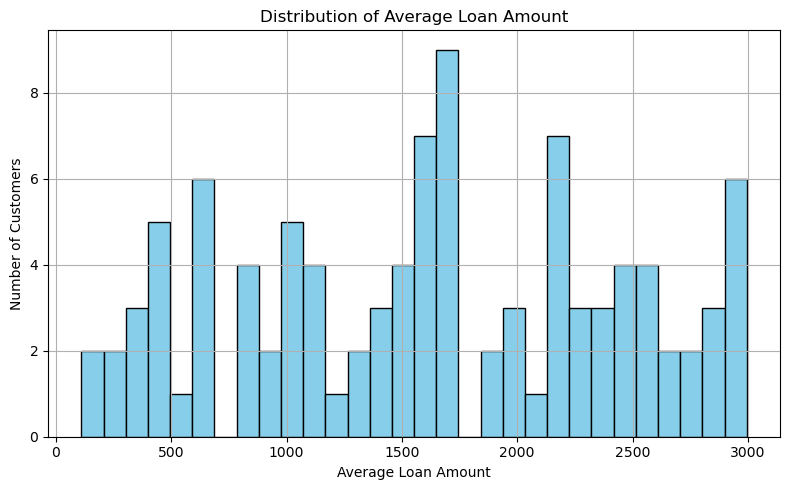

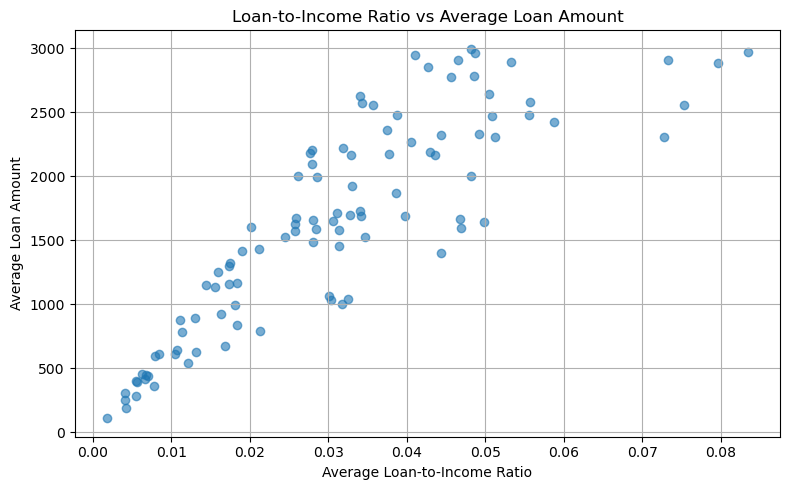

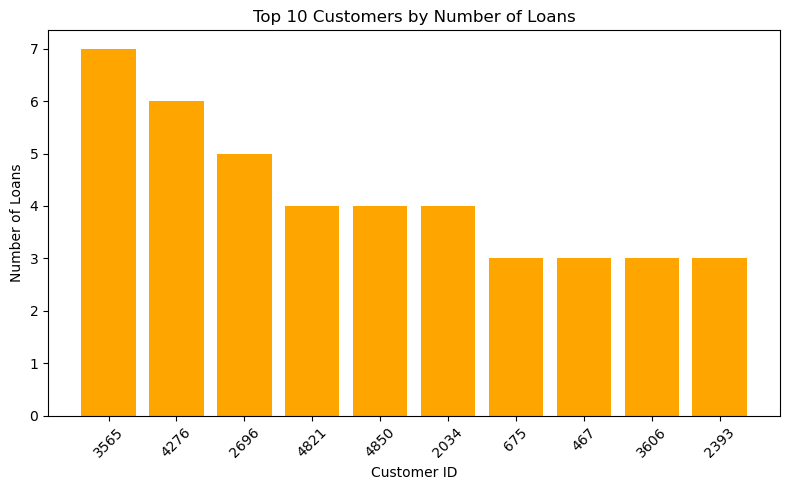

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Parquet output from Spark
df = pd.read_parquet("data/loan_features")

# Print the first few rows
print("Sample engineered data:")
print(df.head())

# -------------------------------
# ðŸ“Š 1. Histogram of average loan amount
plt.figure(figsize=(8, 5))
plt.hist(df['avg_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Loan Amount")
plt.xlabel("Average Loan Amount")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 2. Scatter plot: average loan vs income ratio
plt.figure(figsize=(8, 5))
plt.scatter(df['avg_loan_to_income'], df['avg_amount'], alpha=0.6)
plt.title("Loan-to-Income Ratio vs Average Loan Amount")
plt.xlabel("Average Loan-to-Income Ratio")
plt.ylabel("Average Loan Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 3. Bar chart: number of loans per customer (top 10)
top_customers = df.sort_values(by="num_loans", ascending=False).head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_customers["customer_ID"].astype(str), top_customers["num_loans"], color='orange')
plt.title("Top 10 Customers by Number of Loans")
plt.xlabel("Customer ID")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sample engineered data:
   customer_ID  num_loans   avg_amount     avg_fee  avg_loan_to_income  \
0         1903          1  1581.000000  180.000000            0.031416   
1         2393          3  2555.333333   61.333333            0.035726   
2          451          1   284.000000  169.000000            0.005479   
3         1265          3  1522.666667   96.333333            0.034699   
4         4937          1  2774.000000   74.000000            0.045680   

   default_rate  
0      0.000000  
1      0.000000  
2      1.000000  
3      0.333333  
4      1.000000  


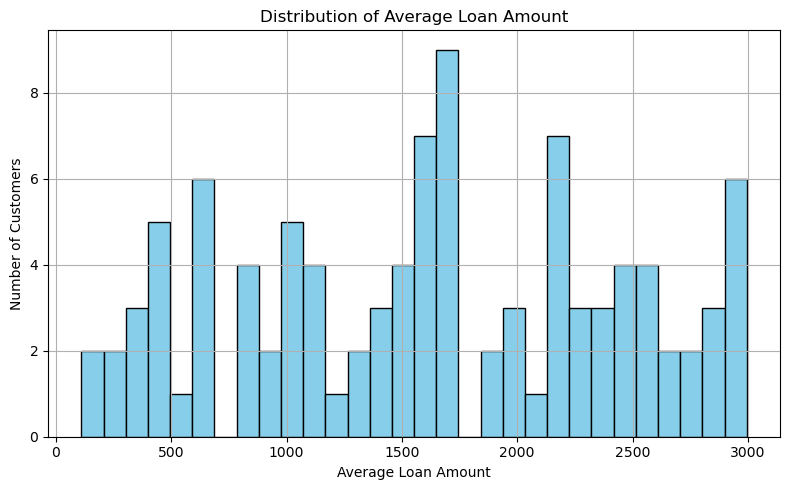

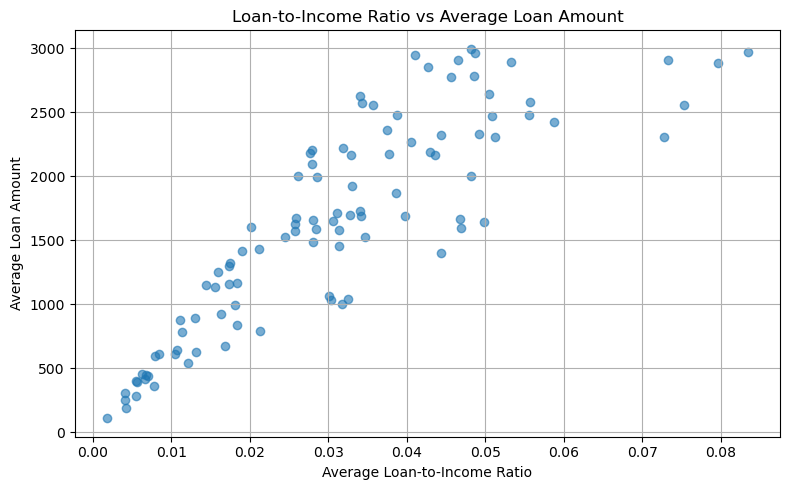

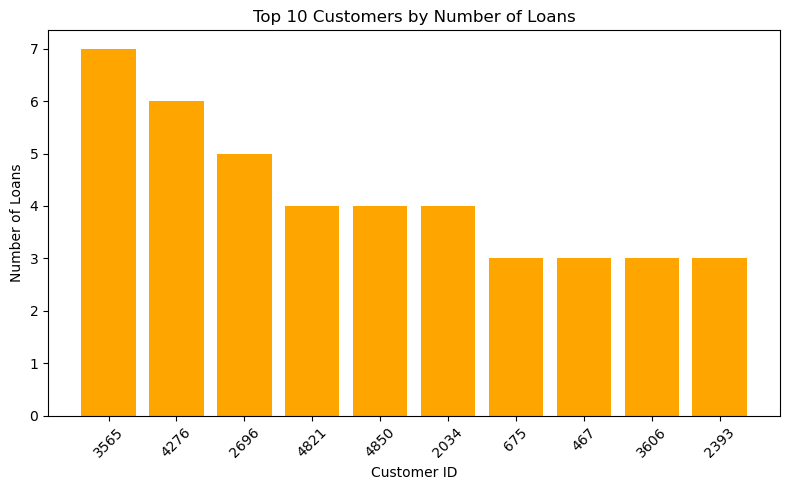

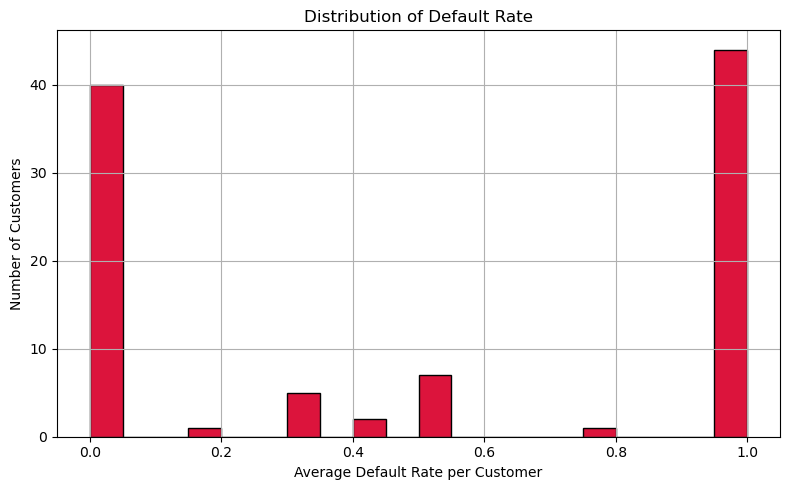

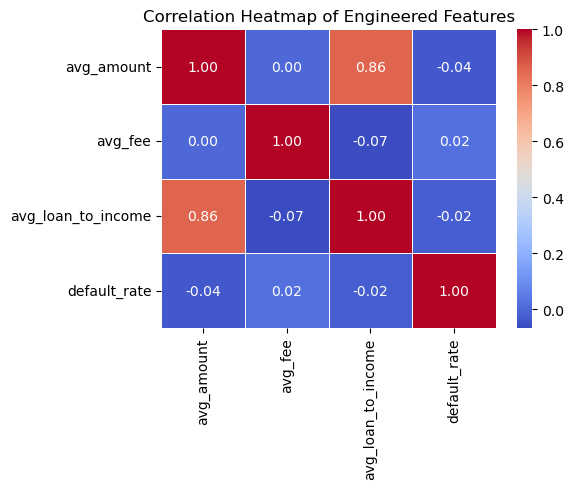

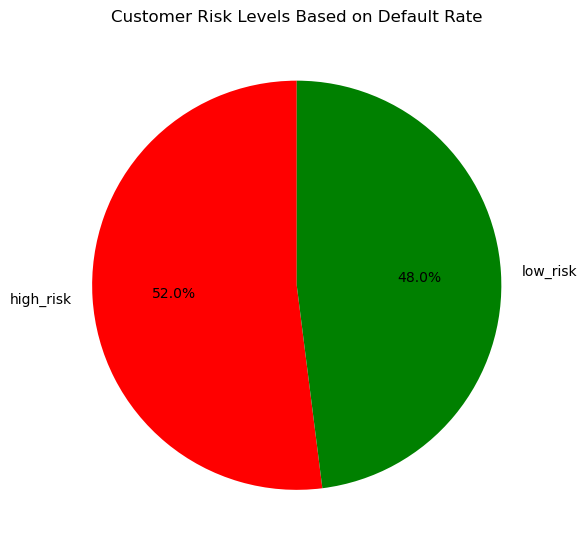

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Parquet output from Spark
df = pd.read_parquet("data/loan_features")

# Print sample data
print("Sample engineered data:")
print(df.head())

# -------------------------------
# ðŸ“Š 1. Histogram of Average Loan Amount
plt.figure(figsize=(8, 5))
plt.hist(df['avg_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Loan Amount")
plt.xlabel("Average Loan Amount")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 2. Scatter plot: Loan-to-Income Ratio vs Average Loan Amount
plt.figure(figsize=(8, 5))
plt.scatter(df['avg_loan_to_income'], df['avg_amount'], alpha=0.6)
plt.title("Loan-to-Income Ratio vs Average Loan Amount")
plt.xlabel("Average Loan-to-Income Ratio")
plt.ylabel("Average Loan Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 3. Bar chart: Top 10 Customers by Number of Loans
top_customers = df.sort_values(by="num_loans", ascending=False).head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_customers["customer_ID"].astype(str), top_customers["num_loans"], color='orange')
plt.title("Top 10 Customers by Number of Loans")
plt.xlabel("Customer ID")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 4. Default Rate Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["default_rate"], bins=20, color="crimson", edgecolor="black")
plt.title("Distribution of Default Rate")
plt.xlabel("Average Default Rate per Customer")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 5. Correlation Heatmap
numeric_cols = ["avg_amount", "avg_fee", "avg_loan_to_income", "default_rate"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features")
plt.tight_layout()
plt.show()

# -------------------------------
# ðŸ“Š 6. Group Customers by Risk Level
df["risk_level"] = df["default_rate"].apply(lambda x: "high_risk" if x >= 0.5 else "low_risk")

risk_counts = df["risk_level"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", startangle=90, colors=["red", "green"])
plt.title("Customer Risk Levels Based on Default Rate")
plt.tight_layout()
plt.show()
